# Happy face
A machine-deep learning system to decide if an image contains a happy face (someone smiling) or not based on a convolutional neural network This project has been implemented using the TensorFlow and Keras frameworks.



## 1. Required framworks
To implement the project, multiple packages need to be installed.
- numpy
- h5py
- matplotlib
- scipy
- PIL
- pandas
- tensorflow

In [9]:
import math
import random
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


%matplotlib inline
np.random.seed(1)

## 2. dataset spliting 
Load the dataset from h5py and split the dataset into training and test sets.

In [4]:
def load_happy_dataset():
    train_dataset = h5py.File('datasets/train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Display a random image from the dataset.

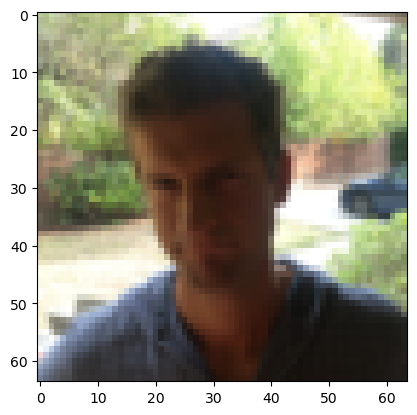

In [16]:
index = random.randint(0,X_train_orig.shape[0])

plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

## 3. Desgin the system model.
The system model contains multiple layers: first add the padding, then compute the convolution, batch normalization, Relu, max pooling, and falter the output to make the fully connected network.

**ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE**

In [17]:
def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    model = tf.keras.Sequential([

        tf.keras.layers.ZeroPadding2D(padding=(3, 3), input_shape=(
            64, 64, 3), data_format="channels_last"),

        tf.keras.layers.Conv2D(32, (7, 7), strides=(1, 1), name='conv0'),


        tf.keras.layers.BatchNormalization(axis=3, name='bn0'),

        tf.keras.layers.ReLU(
            max_value=None, negative_slope=0.0, threshold=0.0
        ),

        tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(1, activation='sigmoid', name='fc'),

    ])

    return model

In [19]:
happy_model = happyModel()

### 3.1 Loss function (Error)

There are many loss functions that can be used in Keras tensorflow. Because this project is binary classification, the proper method is binary cross entropy. Read more [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### 3.2 Optimization methods for reducing overfitting

As a loss function, TensorFlow contains many optimization methods for reducing overfitting, such as Adam, SGD, and RMSprop, etc. For more information, see this [link](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

### 3.3 Evaluate the system mode.

Accuracy, recall, precision, and more are all metrics offered by the TensorFlow Framework to evaluate the system model.[See more](https://www.tensorflow.org/api_docs/python/tf/keras/metrics)

In [22]:
happy_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

### 3.4 summary

Summary() methods are used to show the type of layer, its shape, and how many parameters it has. 

In [23]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pool0 (MaxPooling2D)    (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                        

### 3.4 Train the system

Train the system to find the best parameters (kernel, weight, bias, and so on).

In [24]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 4s 78ms/step - loss: 1.1553 - accuracy: 0.7100
Epoch 2/10
38/38 [==============================] - 3s 79ms/step - loss: 0.2176 - accuracy: 0.9183
Epoch 3/10
38/38 [==============================] - 3s 79ms/step - loss: 0.1419 - accuracy: 0.9417
Epoch 4/10
38/38 [==============================] - 3s 78ms/step - loss: 0.1658 - accuracy: 0.9333
Epoch 5/10
38/38 [==============================] - 3s 77ms/step - loss: 0.1012 - accuracy: 0.9683
Epoch 6/10
38/38 [==============================] - 3s 80ms/step - loss: 0.0868 - accuracy: 0.9667
Epoch 7/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0944 - accuracy: 0.9617
Epoch 8/10
38/38 [==============================] - 3s 77ms/step - loss: 0.1891 - accuracy: 0.9350
Epoch 9/10
38/38 [==============================] - 3s 77ms/step - loss: 0.1569 - accuracy: 0.9600
Epoch 10/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0966 - accuracy: 0.9683


In [25]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 41ms/step - loss: 0.3206 - accuracy: 0.8467


[0.3205595314502716, 0.846666693687439]

### 4. Test the system
select a random image Using the designed model to determine whether or not it correctly predicted it 

1/1 [==============================] - 0s 24ms/step
[[0.9999639]]
This image contains a happy face. Wooooo!!


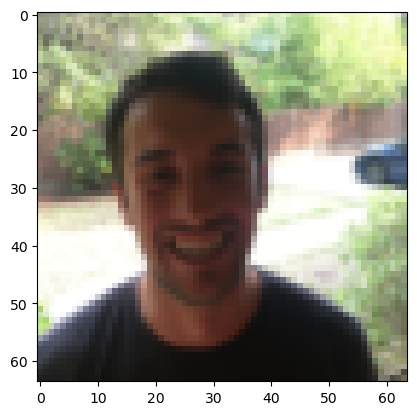

In [58]:
index = random.randint(0,X_test_orig.shape[0])

simle = happy_model.predict(X_test[index:index+1])
print(simle)

if simle > 0.5:
    print('This image contains a happy face. Wooooo!!')
else:
    print('This image does not contain a happy face!!!')

plt.imshow(X_train_orig[index]) #display sample training image
plt.show()